### Machine Learning Engineer Nanodegree

In today’s world we are spending so much of our expenses on purchasing motor bikes and cars.Based on their brands some of them are so expensive.so,when we are affording too much on the vehicles,it is necessary to check and examine all the features of a vehicle.People are now-a-days very passionate about cars. so we should check if  a car with specific features and specifications is worth to buy and as well as safe or not and it really matters.Supervised learning deals with two important concepts called Regression and Classification..I am trying to predict whether the car is worth or not based on its features. 

In [161]:
import numpy as np
import pandas as pd
from time import time
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from IPython.display import display # Allows the use of display() for DataFrames

In [162]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display
%matplotlib inline

data = pd.read_csv("data.csv")

display(data.head())

,Sales,Maintenance,Doors,Persons,lug_boot,safety,Target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [163]:
data.describe()

,Sales,Maintenance,Doors,Persons,lug_boot,safety,Target
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,3,more,med,med,unacc
freq,432,432,432,576,576,576,1210


#### Features and Description


Features and Description
Sales: Level of Sales

Maintenance: Level of maintenance
Doors: Number of doors for the car
Persons: Capacity of the car
lug_boot: Size of the luggage boot
Safety: Safety level of customers
Target:This is our target variable which we should predict .
'acc'-acceptable records
'unacc'-unacceptable records

### Exploration of Data

In [164]:
#Total number of records
records_length = len(data)
 
tmp = data['Target'] == 'acc'

rec_unacc = 0
rec_acc = 0

for k in tmp:
    if k == True:
        rec_acc = rec_acc+1
    elif k == False:
        rec_unacc = rec_unacc+1
        
print("Total number of records: {}".format(records_length))
print("Number of cars acceptable are: {}".format(rec_acc))
print("Number of cars unacceptable are: {}".format(rec_unacc))

Total number of records: 1728
Number of cars acceptable are: 384
Number of cars unacceptable are: 1344


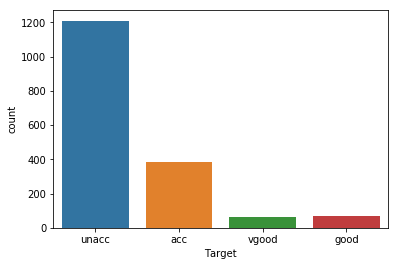

In [165]:
sns.countplot(data['Target'])

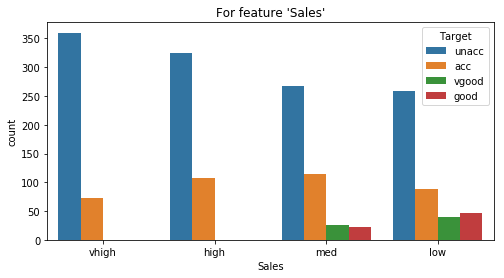

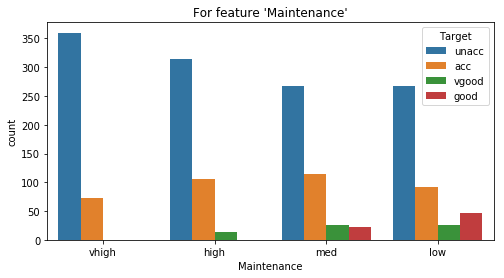

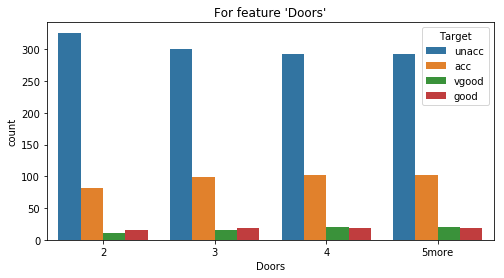

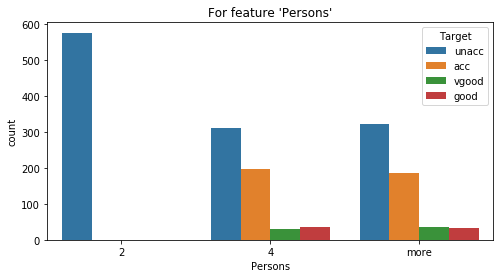

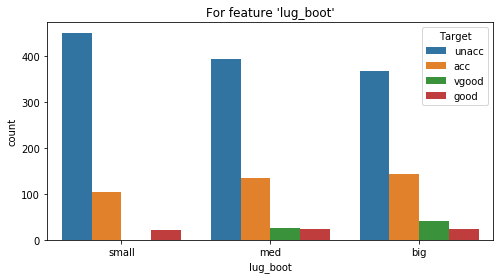

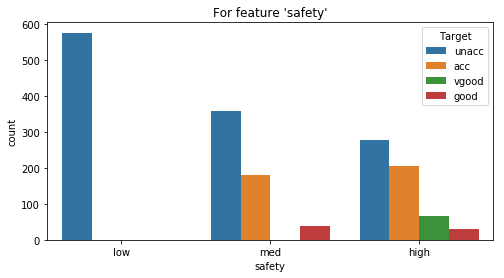

In [167]:
import matplotlib.pyplot as plt
for tmp in data.columns[:-1]:
    plt.figure(figsize=(8,4))
    plt.title("For feature '%s'"%tmp)
    sns.countplot(data[tmp],hue=data['Target'])


### Data Encoding

The dataset has two different kinds of data i.e Categorial data and Numerical data.Caterogorial data can be converted into Numerical data using hot encoding (LabelEncoder).



In [168]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for k in data.columns:
    data[k]=encoder.fit_transform(data[k])
print(data.head())


   Sales  Maintenance  Doors  Persons  lug_boot  safety  Target
0      3            3      0        0         2       1       2
1      3            3      0        0         2       2       2
2      3            3      0        0         2       0       2
3      3            3      0        0         1       1       2
4      3            3      0        0         1       2       2


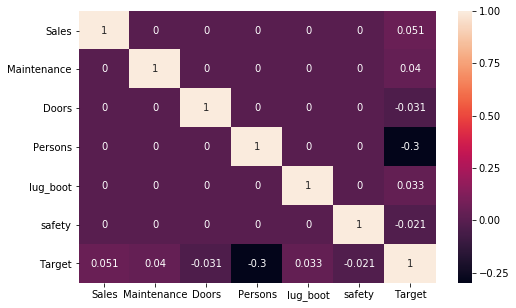

In [169]:
fig=plt.figure(figsize=(8,5))
sns.heatmap(data.corr(),annot=True)

From the map it is evident that there is no correlation between the attributes.

In [170]:
from sklearn.model_selection import train_test_split
X=data[data.columns[:-1]]
y=data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)


In [171]:
from sklearn.metrics import f1_score
regclf=LogisticRegression(random_state=1)
regclf.fit(X_train,y_train)
pred=regclf.predict(X_test)
y_pred=regclf.predict(X_test)
score=f1_score(y_test,y_pred,average='weighted')
print(score)

0.6875256512114724


In [172]:
lcurve=learning_curve(regclf,X_train,y_train,cv=15)
sz=lcurve[0]
train_score = [lcurve[1][i].mean() for i in range (0,5)]
test_score = [lcurve[2][i].mean() for i in range (0,5)]
#fig = plt.figure(figsize = (8,4))
#plt.plot(size,train_score)
#plt.plot(size,test_score)

### K - Nearest Neighbors

In [173]:
knn=KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
knn.score(X_test,y_test)

0.8930635838150289

In [174]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.71      0.76      0.74        59
          1       0.86      0.43      0.57        14
          2       0.93      0.98      0.95       260
          3       1.00      0.31      0.47        13

avg / total       0.90      0.89      0.88       346



### Random Forest Classifier

In [175]:
from sklearn.metrics import f1_score
rfcClf=RandomForestClassifier(random_state=1)
rfcClf.fit(X_train,y_train)
lcurve=learning_curve(rfcClf,X_train,y_train)
size=lcurve[0]
print(f1_score(y_test,rfcClf.predict(X_test),average='macro'))
train_score=[lcurve[1][i].mean() for i in range (0,5)]
test_score=[lcurve[2][i].mean() for i in range (0,5)]


0.9462552198098525


### Feature Weights

[0.15150115 0.18379374 0.06494193 0.23422274 0.07473372 0.29080671]


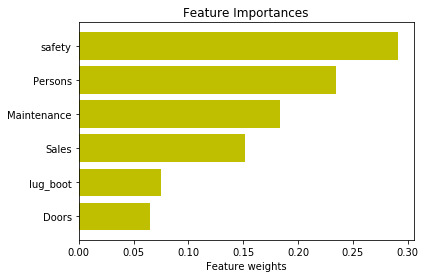

In [176]:
import numpy as np
rfc=RandomForestClassifier()
m=rfc.fit(X_train,y_train)
importances = m.feature_importances_
print(importances)
columns = X_train.columns.values
columns = [x for _,x in sorted(zip(importances,columns))]
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='y', align='center')
plt.yticks(range(len(indices)), columns)
plt.xlabel('Feature weights')
plt.show()

In [177]:
import random
for i in range(5):
    rfc=RandomForestClassifier(random_state=random.randrange(1,500,10))
    rfc.fit(X_train,y_train)
    print rfc.score(X_test,y_test)

0.9364161849710982
0.9566473988439307
0.9595375722543352
0.9595375722543352
0.9595375722543352


In [178]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X[['Sales', 'Maintenance', 'Persons', 'safety']],
    y, train_size=0.8, random_state=1)
print(X_train.shape, y_train.shape)
print(X_train.shape, y_train.shape)

((1382, 6), (1382L,))
((1382, 6), (1382L,))


### Optimised Model¶

By observing above all ensemble methods and other supervised learning methods we can say that Random Forest Classifier has high f-score when compared to other models.

I reduced the data by only considering models which are in top 4 feature weights.

I used Random Classifier model on reduced data and with max_depth=10.

In [179]:
from sklearn.model_selection import GridSearchCV
param_grid={'max_depth':[5,10,20],
           'max_features':[4,6,'auto'],
           'max_leaf_nodes':[2,3,None],}
grid=GridSearchCV(estimator=RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=30),
                  param_grid=param_grid,cv=10,n_jobs=-1)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid)

{'max_features': 4, 'max_leaf_nodes': None, 'max_depth': 20}
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=30, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': [4, 6, 'auto'], 'max_leaf_nodes': [2, 3, None], 'max_depth': [5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


In [180]:
from sklearn.metrics import f1_score
rfcClf=RandomForestClassifier(max_depth=10,random_state=10,max_features=6,max_leaf_nodes=None)
rfcClf.fit(X_train,y_train)
print(f1_score(y_test,rfcClf.predict(X_test),average='macro'))

0.9562371285672256


### Conclusion

RandomForestClassifier is the best model for this data among all other models with following parameters: 'max_features': 6, 'max_leaf_nodes': None, 'max_depth': 10 and 'random_state': 10. We are getting an F1_score of 0.9562371285672256